# Book Recommendation System

<img src="https://s26162.pcdn.co/wp-content/uploads/2024/03/book-bible-old-antique-preview.jpg">

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv("/kaggle/input/goodreadsbooks/books.csv",
                 on_bad_lines="skip",
                 encoding="utf-8")

In [3]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [6]:
df.tail()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco
11122,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros


In [4]:
df.shape

(11123, 12)

In [5]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [7]:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [8]:
df["average_rating"] = pd.to_numeric(df["average_rating"], errors="coerce")
df["ratings_count"] = pd.to_numeric(df["ratings_count"], errors="coerce")

In [9]:
df = df.dropna(subset=["average_rating", "ratings_count"])

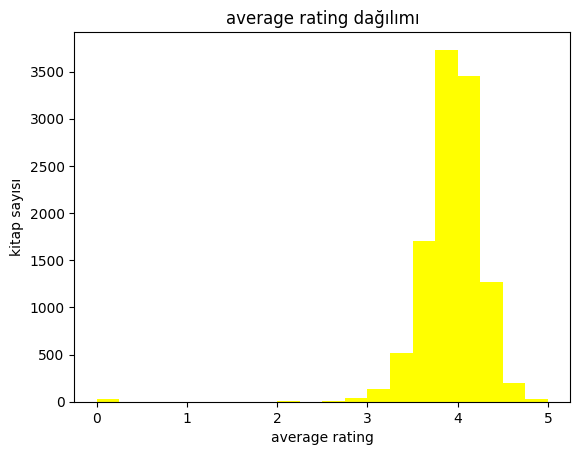

In [11]:
plt.figure()
plt.hist(df["average_rating"], bins=20, color="yellow")
plt.title("average rating dağılımı")
plt.xlabel("average rating")
plt.ylabel("kitap sayısı")
plt.show()

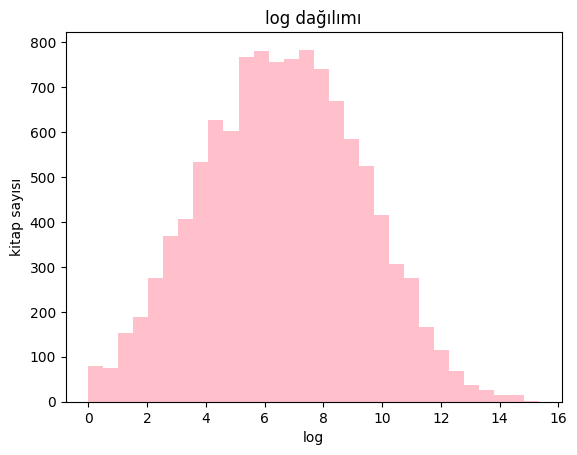

In [12]:
plt.figure()
plt.hist(np.log1p(df["ratings_count"]), bins=30, color="pink")
plt.title("log dağılımı")
plt.xlabel("log")
plt.ylabel("kitap sayısı")
plt.show()

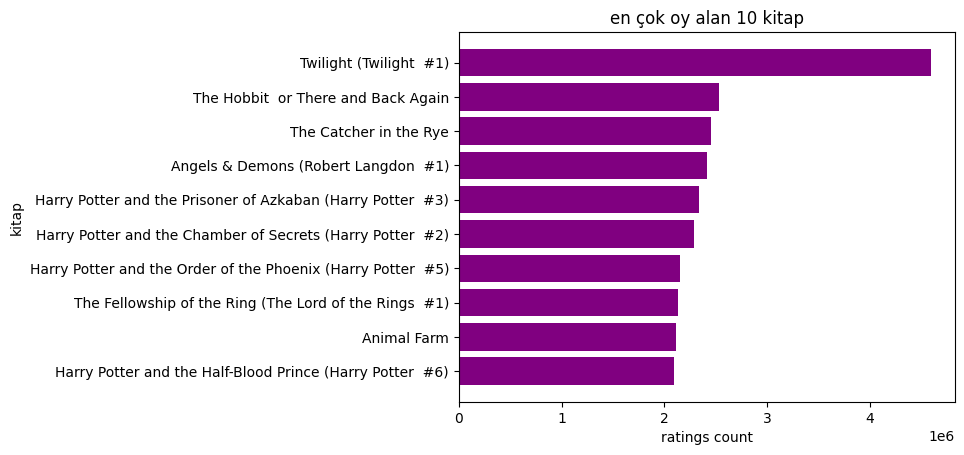

In [16]:
top_books = (df.sort_values("ratings_count", ascending=False).head(10))

plt.figure()
plt.barh(top_books["title"], top_books["ratings_count"], color="purple")
plt.title("en çok oy alan 10 kitap")
plt.xlabel("ratings count")
plt.ylabel("kitap")
plt.gca().invert_yaxis()
plt.show()

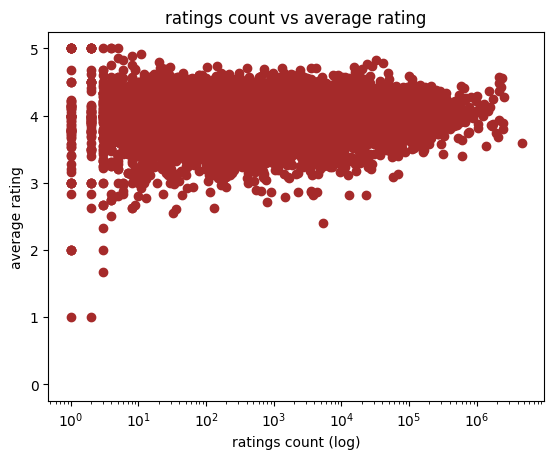

In [19]:
plt.figure()
plt.scatter(df["ratings_count"], df["average_rating"], color="brown")
plt.xscale("log")
plt.title("ratings count vs average rating")
plt.xlabel("ratings count (log)")
plt.ylabel("average rating")
plt.show()

In [21]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [26]:
df = df[["title", "authors"]].copy()

In [27]:
df["authors"] = df["authors"].fillna("")
df["title"] = df["title"].fillna("")

In [28]:
df["feature_text"] = (
    df["title"] + " " + df["authors"]).str.lower()

In [29]:
tfidf = TfidfVectorizer(
    stop_words="english",
    max_features=5000)

In [30]:
tfidf_matrix = tfidf.fit_transform(df["feature_text"])

In [31]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [32]:
title_index = pd.Series(df.index, index=df["title"]).drop_duplicates()

def recommend_books(book_title, top_n=5):
    if book_title not in title_index:
        return "kitap bulunamadı"

    idx = title_index[book_title]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:top_n + 1]
    book_indices = [i[0] for i in sim_scores]

    return df["title"].iloc[book_indices]

In [33]:
recommend_books("The Hobbit", top_n=5)

1700     The Hobbit: Or There and Back Again
1701                              The Hobbit
1699                   Poems From The Hobbit
6271    The Hobbit  or  There and Back Again
4272      The Lord of the Rings / The Hobbit
Name: title, dtype: object

In [35]:
from sentence_transformers import SentenceTransformer
import os

model_name = "sentence-transformers/all-MiniLM-L6-v2"
output_dir = "/kaggle/working/all-minilm-l6-v2"

os.makedirs(output_dir, exist_ok=True)

model = SentenceTransformer(model_name)
model.save(output_dir)

print("model kaydedildi:", output_dir)

OSError: microsoft/MiniLM-L6-H384-uncased is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `hf auth login` or by passing `token=<your_token>`